In [84]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import plotly as plt
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
crime_dataset = pd.read_csv('/content/Reported_Crimes_(ASR-RC-TBL-001).csv')

In [6]:
crime_dataset.head()

,Index_,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId
0,1,2014,D11,Controlled Drugs and Substances Act,Other,201,195,1
1,2,2014,D11,Crimes Against Property,Auto Theft,124,43,2
2,3,2014,D11,Crimes Against Property,Break & Enter-Apartment,85,37,3
3,4,2014,D11,Crimes Against Property,Break & Enter-Commercial,58,18,4
4,5,2014,D11,Crimes Against Property,Break & Enter-House,89,34,5


In [7]:
#crime_dataset = crime.loc(data.columns[['Index_']],axis=1)

In [8]:
crime_dataset.head()

,Index_,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId
0,1,2014,D11,Controlled Drugs and Substances Act,Other,201,195,1
1,2,2014,D11,Crimes Against Property,Auto Theft,124,43,2
2,3,2014,D11,Crimes Against Property,Break & Enter-Apartment,85,37,3
3,4,2014,D11,Crimes Against Property,Break & Enter-Commercial,58,18,4
4,5,2014,D11,Crimes Against Property,Break & Enter-House,89,34,5


In [9]:
crime_dataset.tail()

,Index_,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId
2696,2600,2021,D43,Criminal Code Traffic,Other,134,117,2697
2697,2601,2021,D43,Other Criminal Code Violations,Other,831,677,2698
2698,2602,2021,D43,Other Criminal Code Violations,Other Criminal Violations - Offensive Weapons,90,81,2699
2699,2603,2021,D43,Other Federal Statute Violations,Other,4,2,2700
2700,2604,2021,D51,Controlled Drugs and Substances Act,Other,209,188,2701


In [10]:
crime_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2701 entries, 0 to 2700
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Index_        2701 non-null   int64 
 1   ReportedYear  2701 non-null   int64 
 2   GeoDivision   2701 non-null   object
 3   Category      2701 non-null   object
 4   Subtype       2701 non-null   object
 5   Count_        2701 non-null   int64 
 6   CountCleared  2701 non-null   int64 
 7   ObjectId      2701 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 168.9+ KB


In [11]:
crime_dataset.columns

Index(['Index_', 'ReportedYear', 'GeoDivision', 'Category', 'Subtype',
       'Count_', 'CountCleared', 'ObjectId'],
      dtype='object')

In [12]:
crime_dataset.describe()

,Index_,ReportedYear,Count_,CountCleared,ObjectId
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,1351.000000,2017.492410,373.982969,161.260274,1351.000000
std,779.855863,2.287089,660.664930,267.483140,779.855863
min,1.000000,2014.000000,1.000000,0.000000,1.000000
25%,676.000000,2016.000000,53.000000,15.000000,676.000000
50%,1351.000000,2017.000000,134.000000,56.000000,1351.000000
75%,2026.000000,2019.000000,380.000000,153.000000,2026.000000
max,2701.000000,2021.000000,7256.000000,2207.000000,2701.000000


In [13]:
#Count how many nulls we have in each variable
crime_dataset.isnull().sum()
crime_dataset.fillna('', inplace=True) #changing the nulls to empty strings
crime_dataset.isnull().sum() #now there is not blanks in data

Index_          0
ReportedYear    0
GeoDivision     0
Category        0
Subtype         0
Count_          0
CountCleared    0
ObjectId        0
dtype: int64

In [14]:
crime_dataset.shape

(2701, 8)

In [15]:
crime_dataset.shape[0]

2701

In [16]:
crime_dataset.shape[1]

8

In [17]:
type(crime_dataset.Count_)

pandas.core.series.Series

In [18]:
count_of_crime_by_subtyp = crime_dataset.groupby(['Subtype']).size(); count_of_crime_by_subtyp
subcategory=pd.DataFrame(count_of_crime_by_subtyp)
subcategory.rename(columns={0:'count'},inplace = True)
subcategory
subcategory_data = crime_dataset['Subtype'].value_counts().rename_axis('SubCat').reset_index(name = 'counts')
subcategory_data


,SubCat,counts
0,Other,816
1,Auto Theft,136
2,Break & Enter-Apartment,136
3,Break & Enter-Commercial,136
4,Break & Enter-House,136
5,Fraud,136
6,Theft Over $5000,136
7,Theft Under $5000,136
8,Assault,136
9,Robbery-Other,136


In [19]:
count_of_crime_by_subtyp = crime_dataset.groupby(['Category']).size(); count_of_crime_by_subtyp
main_category=pd.DataFrame(count_of_crime_by_subtyp)
main_category.rename(columns={0:'count'},inplace = True)
main_category

,count
Category,
Controlled Drugs and Substances Act,136
Crimes Against Property,1222
Crimes Against the Person,799
Criminal Code Traffic,136
Other Criminal Code Violations,272
Other Federal Statute Violations,136


In [20]:
main_category_data = crime_dataset['Category'].value_counts().rename_axis('Cat').reset_index(name = 'counts')
main_category_data

,Cat,counts
0,Crimes Against Property,1222
1,Crimes Against the Person,799
2,Other Criminal Code Violations,272
3,Controlled Drugs and Substances Act,136
4,Criminal Code Traffic,136
5,Other Federal Statute Violations,136


In [21]:
x = main_category_data.Cat
y = main_category_data.counts
explode_r = [0.1,0.1,0.1,0.1,0.1,0.1]

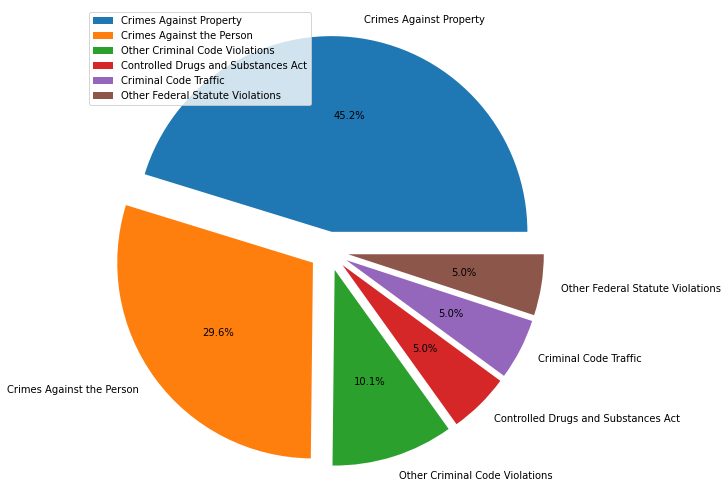

In [22]:
from enum import auto
import matplotlib.pyplot as plt
plt.figure(figsize = (10,9))
plt.pie(main_category_data["counts"],labels = main_category_data["Cat"],autopct='%0.1f%%',explode=explode_r)
plt.legend(loc=2)
plt.show()

In [ ]:
crime_dataset.Subtype == 'Break & Enter-Apartment'

0       False
1       False
2        True
3       False
4       False
        ...  
2696    False
2697    False
2698    False
2699    False
2700    False
Name: Subtype, Length: 2701, dtype: bool

In [23]:
Break_enter_apartment =  crime_dataset[crime_dataset.Subtype == 'Break & Enter-Apartment']
Break_enter_apartment

,Index_,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId
2,3,2014,D11,Crimes Against Property,Break & Enter-Apartment,85,37,3
22,23,2014,D12,Crimes Against Property,Break & Enter-Apartment,76,44,23
42,43,2014,D13,Crimes Against Property,Break & Enter-Apartment,62,20,43
51,202,2014,D42,Crimes Against Property,Break & Enter-Apartment,57,15,52
71,222,2014,D43,Crimes Against Property,Break & Enter-Apartment,151,58,72
...,...,...,...,...,...,...,...,...
2596,2429,2021,D14,Crimes Against Property,Break & Enter-Apartment,179,59,2597
2616,2449,2021,D22,Crimes Against Property,Break & Enter-Apartment,84,25,2617
2635,2488,2021,D31,Crimes Against Property,Break & Enter-Apartment,72,19,2636
2663,2567,2021,D42,Crimes Against Property,Break & Enter-Apartment,48,13,2664


In [24]:
crime_dataset.corr()

,Index_,ReportedYear,Count_,CountCleared,ObjectId
Index_,1.000000,0.992154,0.023702,-0.055526,0.982348
ReportedYear,0.992154,1.000000,0.017948,-0.063571,0.977183
Count_,0.023702,0.017948,1.000000,0.806702,0.024291
CountCleared,-0.055526,-0.063571,0.806702,1.000000,-0.053293
ObjectId,0.982348,0.977183,0.024291,-0.053293,1.000000


In [25]:


address = []
for value in crime_dataset["GeoDivision"]:
  if value == 'D11':
    address.append("2054 Davenport Rd, Toronto, Ontario")
  elif value == 'D12':
    address.append("200 Trethewey Dr, North York, ON M6M 5E6")
  elif value == 'D13':
    address.append("1435 Eglinton Ave W, York, ON M6C 3Z4")
  elif value == 'D14' :
    address.append("350 Dovercourt Rd, Toronto, ON M6J 3E3")
  elif value == 'D22' :
    address.append("3699 Bloor St W, Etobicoke, ON M9A 1A2") 
  elif value == 'D23' :
    address.append("5230 Finch Ave W, Etobicoke, ON M9V 0A1")
  elif value == 'D31' :
    address.append("40 Norfinch Dr, North York, ON M3N 1X1")
  elif value == 'D32' :
    address.append("30 Ellerslie Ave, North York, ON M2N 1X8")
  elif value == 'D33':
    address.append("50 Upjohn Rd, North York, ON M3B 2W1")   
  elif value == 'D41' :
    address.append("2222 Eglinton Ave E, Scarborough, ON M1K 2M2")
  elif value == 'D42' :
    address.append("242 Milner Ave, Scarborough, ON M1S 5C4")
  elif value == 'D43' :
    address.append("4331 Lawrence Ave E, Scarborough, ON M1E 2T4")
  elif value == 'D51':
    address.append("51 Parliament St, Toronto, ON M5A 2Y5")
  elif value == 'D52' :
    address.append("255 Dundas St W, Toronto, ON M5T 2W5")
  elif value == 'D53' :
    address.append("75 Eglinton Ave W, Toronto, ON M4R 2G9")
  elif value == 'D44/D55' :
    address.append("101 Coxwell Ave, Toronto, ON M4L 3B3")
  elif value == 'NSA':
    address.append("51 Parliament St, Toronto, ON M5A 2Y5")
  else:
    address.append("NA")
crime_dataset["police_station_address"] = address
crime_dataset = pd.DataFrame(crime_dataset)
crime_dataset.head()

,Index_,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId,police_station_address
0,1,2014,D11,Controlled Drugs and Substances Act,Other,201,195,1,"2054 Davenport Rd, Toronto, Ontario"
1,2,2014,D11,Crimes Against Property,Auto Theft,124,43,2,"2054 Davenport Rd, Toronto, Ontario"
2,3,2014,D11,Crimes Against Property,Break & Enter-Apartment,85,37,3,"2054 Davenport Rd, Toronto, Ontario"
3,4,2014,D11,Crimes Against Property,Break & Enter-Commercial,58,18,4,"2054 Davenport Rd, Toronto, Ontario"
4,5,2014,D11,Crimes Against Property,Break & Enter-House,89,34,5,"2054 Davenport Rd, Toronto, Ontario"


In [37]:
name1=crime_dataset["police_station_address"].str.split(", ", expand = True)
crime_dataset["PO_ADD"] = name1[1]
crime_dataset.head()

,Index_,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId,police_station_address,PO_ADD
0,1,2014,D11,Controlled Drugs and Substances Act,Other,201,195,1,"2054 Davenport Rd, Toronto, Ontario",Toronto
1,2,2014,D11,Crimes Against Property,Auto Theft,124,43,2,"2054 Davenport Rd, Toronto, Ontario",Toronto
2,3,2014,D11,Crimes Against Property,Break & Enter-Apartment,85,37,3,"2054 Davenport Rd, Toronto, Ontario",Toronto
3,4,2014,D11,Crimes Against Property,Break & Enter-Commercial,58,18,4,"2054 Davenport Rd, Toronto, Ontario",Toronto
4,5,2014,D11,Crimes Against Property,Break & Enter-House,89,34,5,"2054 Davenport Rd, Toronto, Ontario",Toronto


In [27]:
address = crime_dataset.groupby(['police_station_address']).size()
address

police_station_address
1435 Eglinton Ave W, York, ON M6C 3Z4           158
200 Trethewey Dr, North York, ON M6M 5E6        159
2054 Davenport Rd, Toronto, Ontario             159
2222 Eglinton Ave E, Scarborough, ON M1K 2M2    160
242 Milner Ave, Scarborough, ON M1S 5C4         160
255 Dundas St W, Toronto, ON M5T 2W5            160
30 Ellerslie Ave, North York, ON M2N 1X8        160
350 Dovercourt Rd, Toronto, ON M6J 3E3          160
3699 Bloor St W, Etobicoke, ON M9A 1A2          160
40 Norfinch Dr, North York, ON M3N 1X1          158
4331 Lawrence Ave E, Scarborough, ON M1E 2T4    159
50 Upjohn Rd, North York, ON M3B 2W1            160
51 Parliament St, Toronto, ON M5A 2Y5           314
5230 Finch Ave W, Etobicoke, ON M9V 0A1         159
75 Eglinton Ave W, Toronto, ON M4R 2G9          155
NA                                              160
dtype: int64

In [28]:
#Count how many nulls we have in each variable
crime_dataset.isnull().sum()
crime_dataset.fillna('', inplace=True) #changing the nulls to empty strings
crime_dataset.isnull().sum() #now there is not blanks in data

Index_                    0
ReportedYear              0
GeoDivision               0
Category                  0
Subtype                   0
Count_                    0
CountCleared              0
ObjectId                  0
police_station_address    0
PO_ADD                    0
dtype: int64

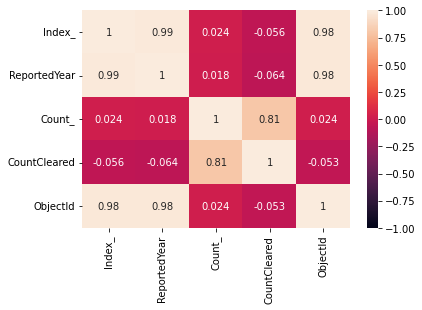

In [29]:
#sns.heatmap(data.corr());
heatmap = sns.heatmap(crime_dataset.corr(), vmin=-1, vmax=1, annot=True)
heatmap

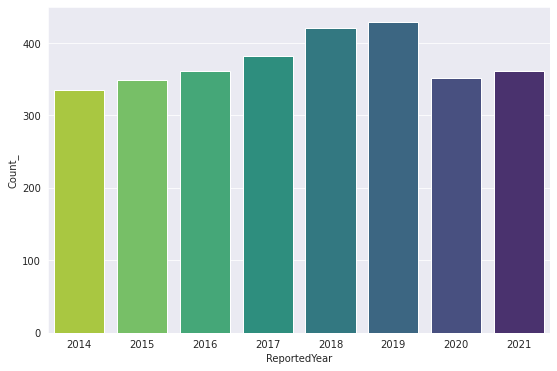

In [30]:
from matplotlib.pylab import subplot
plt.figure(figsize=(9,6))
sns.set_style('darkgrid')
g1 = sns.barplot(data=crime_dataset, x='ReportedYear', y='Count_',
                ci=False, palette='viridis_r')
plt.show()

In [74]:
address = crime_dataset.groupby(['PO_ADD']).size()
address

PO_ADD
Etobicoke      319
North York     637
Scarborough    479
Toronto        948
York           158
dtype: int64

In [ ]:
from enum import auto
import matplotlib.pyplot as plt
plt.figure(figsize = (10,9))
plt.pie(crime_dataset["PO_ADD"],labels = main_category_data["Cat"],autopct='%0.1f%%',explode=explode_r)
plt.legend(loc=2)
plt.show()

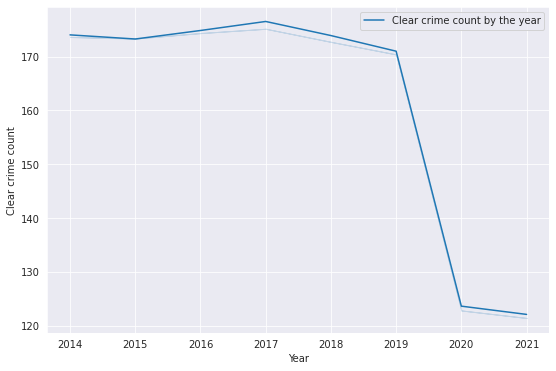

In [31]:
from matplotlib import axes
import matplotlib.pyplot as plt 
plt.figure(figsize=(9,6))
g1 = sns.lineplot(data=crime_dataset, x='ReportedYear', y='CountCleared',markers='o',sort = False,label = 'Clear crime count by the year',
                ci=False,)
g1.set(xlabel = "Year",ylabel="Clear crime count")
plt.show()

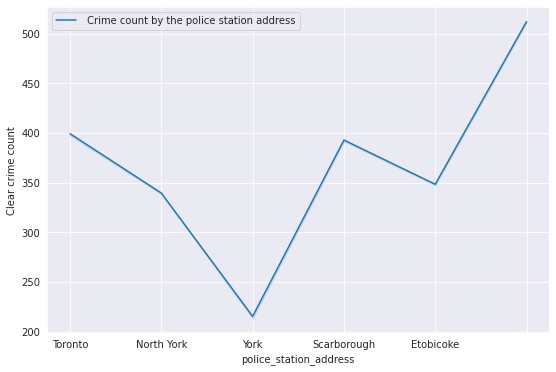

In [32]:
from matplotlib import axes
import matplotlib.pyplot as plt 
plt.figure(figsize=(9,6))
g1 = sns.lineplot(data=crime_dataset, x='PO_ADD', y='Count_',markers='o',sort = False,label = ' Crime count by the police station address',
                ci=False,)
g1.set(xlabel = "police_station_address",ylabel="Clear crime count")
plt.show()

In [33]:
import plotly.express as px
df = px.data.tips()
fig1 = px.box(crime_dataset, x="Subtype" ,y="Count_")
fig1.show()

In [34]:
import plotly.express as px
df = px.data.tips()
fig1 = px.scatter(crime_dataset, x="CountCleared" ,y="Subtype")
fig1.show()

In [63]:
#duplicated the data set to create the geocode
dataH_Map = crime_dataset
dataH_Map.head()

,Index_,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId,police_station_address,PO_ADD
0,1,2014,D11,Controlled Drugs and Substances Act,Other,201,195,1,"2054 Davenport Rd, Toronto, Ontario",Toronto
1,2,2014,D11,Crimes Against Property,Auto Theft,124,43,2,"2054 Davenport Rd, Toronto, Ontario",Toronto
2,3,2014,D11,Crimes Against Property,Break & Enter-Apartment,85,37,3,"2054 Davenport Rd, Toronto, Ontario",Toronto
3,4,2014,D11,Crimes Against Property,Break & Enter-Commercial,58,18,4,"2054 Davenport Rd, Toronto, Ontario",Toronto
4,5,2014,D11,Crimes Against Property,Break & Enter-House,89,34,5,"2054 Davenport Rd, Toronto, Ontario",Toronto


In [77]:
dataH_Map = dataH_Map.loc[0:161,:]
dataH_Map.head()

,Index_,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId,police_station_address,PO_ADD
0,1,2014,D11,Controlled Drugs and Substances Act,Other,201,195,1,"2054 Davenport Rd, Toronto, Ontario",Toronto
1,2,2014,D11,Crimes Against Property,Auto Theft,124,43,2,"2054 Davenport Rd, Toronto, Ontario",Toronto
2,3,2014,D11,Crimes Against Property,Break & Enter-Apartment,85,37,3,"2054 Davenport Rd, Toronto, Ontario",Toronto
3,4,2014,D11,Crimes Against Property,Break & Enter-Commercial,58,18,4,"2054 Davenport Rd, Toronto, Ontario",Toronto
4,5,2014,D11,Crimes Against Property,Break & Enter-House,89,34,5,"2054 Davenport Rd, Toronto, Ontario",Toronto


In [39]:
from geopy.geocoders import Nominatim
locator = Nominatim(user_agent='myGeocoder')
police_station_address	 = locator.geocode(' Ontario, Canada')
print(police_station_address.address)
print((police_station_address.latitude, police_station_address.longitude))

Ontario, Canada
(50.000678, -86.000977)


In [40]:
import matplotlib.pyplot as plt#
!pip install geopandas
import geopandas as gpd
import folium
from folium import plugins
import datetime
import math
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.1 MB/s 
     |████████████████████████████████| 6.3 MB 45.2 MB/s 
     |████████████████████████████████| 16.7 MB 41.9 MB/s 


In [78]:
from operator import add
geo = Nominatim(user_agent="myapp")
#loc = geo.geocode('938 st louis ave, canada')
#print(loc)

dataH_Map['Lon'] = ''
dataH_Map['Lat'] = ''

for i in range(0, len(dataH_Map)):
  police_station_address = geo.geocode(dataH_Map['police_station_address'][i], timeout = 10)
  try:
    dataH_Map['Lon'][i] = police_station_address.longitude
    dataH_Map['Lat'][i] = police_station_address.latitude
  except:
    dataH_Map['Lon'][i] = ''
    dataH_Map['Lat'][i] = ''

dataH_Map.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

,Index_,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId,police_station_address,PO_ADD,Lon,Lat
0,1,2014,D11,Controlled Drugs and Substances Act,Other,201,195,1,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
1,2,2014,D11,Crimes Against Property,Auto Theft,124,43,2,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
2,3,2014,D11,Crimes Against Property,Break & Enter-Apartment,85,37,3,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
3,4,2014,D11,Crimes Against Property,Break & Enter-Commercial,58,18,4,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
4,5,2014,D11,Crimes Against Property,Break & Enter-House,89,34,5,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035


In [79]:
dataH_Map['Lon'].replace('', np.nan, inplace = True)
dataH_Map['Lat'].replace('', np.nan, inplace = True)
dataH_Map.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Index_,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId,police_station_address,PO_ADD,Lon,Lat
0,1,2014,D11,Controlled Drugs and Substances Act,Other,201,195,1,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
1,2,2014,D11,Crimes Against Property,Auto Theft,124,43,2,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
2,3,2014,D11,Crimes Against Property,Break & Enter-Apartment,85,37,3,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
3,4,2014,D11,Crimes Against Property,Break & Enter-Commercial,58,18,4,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
4,5,2014,D11,Crimes Against Property,Break & Enter-House,89,34,5,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035


In [80]:
dataH_Map.dropna(subset=['Lon'], inplace=True)
dataH_Map.tail(35)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Index_,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId,police_station_address,PO_ADD,Lon,Lat
127,128,2014,D31,Crimes Against Property,Other,724,344,128,"40 Norfinch Dr, North York, ON M3N 1X1",North York,-79.527512,43.756763
128,129,2014,D31,Crimes Against Property,Theft Over $5000,65,28,129,"40 Norfinch Dr, North York, ON M3N 1X1",North York,-79.527512,43.756763
129,130,2014,D31,Crimes Against Property,Theft Under $5000,1619,613,130,"40 Norfinch Dr, North York, ON M3N 1X1",North York,-79.527512,43.756763
130,131,2014,D31,Crimes Against the Person,Assault,1073,808,131,"40 Norfinch Dr, North York, ON M3N 1X1",North York,-79.527512,43.756763
131,132,2014,D31,Crimes Against the Person,Attempt Murder,10,5,132,"40 Norfinch Dr, North York, ON M3N 1X1",North York,-79.527512,43.756763
132,133,2014,D31,Crimes Against the Person,Other,301,206,133,"40 Norfinch Dr, North York, ON M3N 1X1",North York,-79.527512,43.756763
133,134,2014,D31,Crimes Against the Person,Robbery-Other,253,108,134,"40 Norfinch Dr, North York, ON M3N 1X1",North York,-79.527512,43.756763
134,135,2014,D31,Crimes Against the Person,Sexual Violation,141,96,135,"40 Norfinch Dr, North York, ON M3N 1X1",North York,-79.527512,43.756763
135,136,2014,D31,Criminal Code Traffic,Other,136,133,136,"40 Norfinch Dr, North York, ON M3N 1X1",North York,-79.527512,43.756763
136,137,2014,D31,Other Criminal Code Violations,Other,844,789,137,"40 Norfinch Dr, North York, ON M3N 1X1",North York,-79.527512,43.756763


In [81]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [82]:
import matplotlib.pyplot as plt#
!pip install geopandas
import geopandas as gpd
import folium
from folium import plugins
import datetime
import math


lon = dataH_Map['Lon'].mean()
lat = dataH_Map['Lat'].mean()
data_map = folium.Map([lat, lon], zoom_start = 10, prefer_canvas=True, control_scale=True, width='80%', height='80%')
#tiles = 'Stamen Toner'
#tiles = 'cartodbpositron'

html = '''1st line<br>
2nd line<br>
3rd line'''

iframe = folium.IFrame(html,
                       width=100,
                       height=100)

data_crime_map = plugins.MarkerCluster().add_to(data_map)
for lat,lon,label in zip(dataH_Map['Lat'],dataH_Map['Lon'],dataH_Map['police_station_address']):
   folium.Marker(location=[lat,lon],icon=None,popup=label).add_to(data_crime_map)
data_map.add_child(data_crime_map)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
#its show relasitionship between clear crime count compare to crime count



import plotly.express as px

df = px.data.tips()
fig = px.scatter(
    crime_dataset, x='CountCleared', y='Count_', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

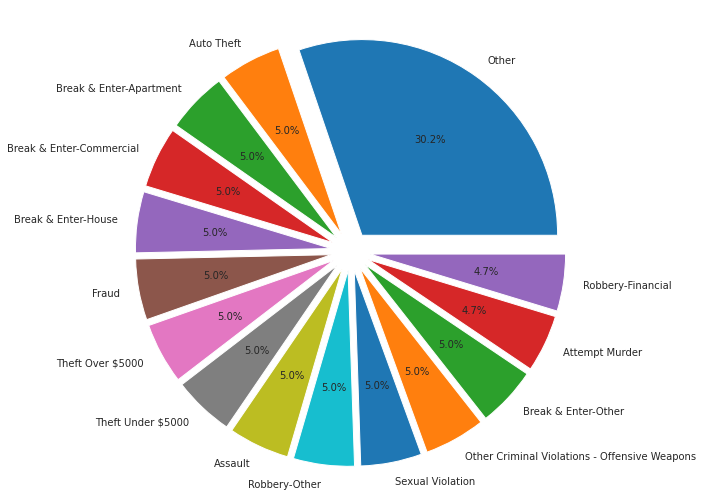

In [ ]:
x = subcategory_data.SubCat
y = subcategory_data.counts
explode_r = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
from enum import auto
import matplotlib.pyplot as plt
plt.figure(figsize = (10,9))
plt.pie(subcategory_data["counts"],labels = subcategory_data["SubCat"],autopct='%0.001f%%',explode=explode_r)
plt.show()

In [ ]:
type(crime_dataset.Count_)

pandas.core.series.Series

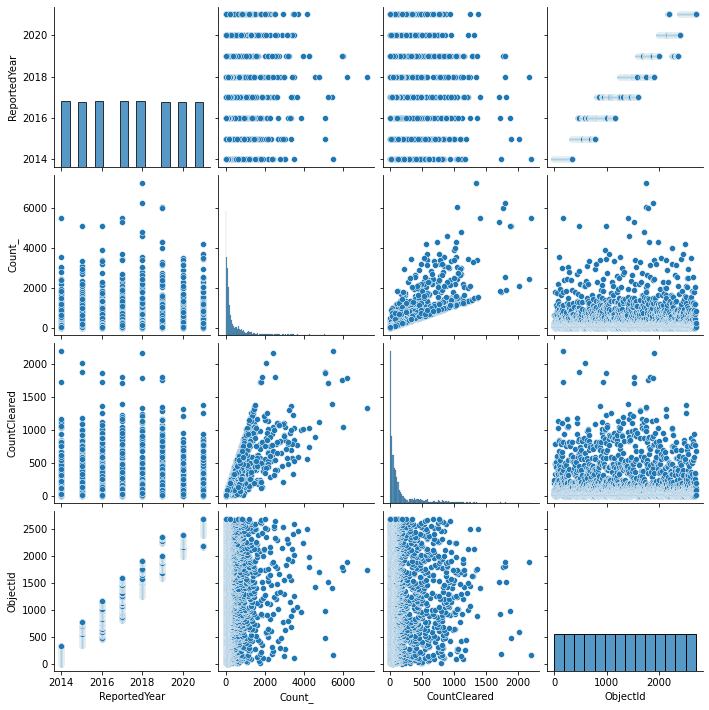

In [ ]:
sns.pairplot(crime_dataset)